In [1]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import math
import numpy as np
import time
import torch
import torchvision
import csgm
import dcgan
import skimage
import anchor_image
import image_utils

In [2]:
mnist_test = torchvision.datasets.MNIST('./', train=False, transform=lambda x: np.array(x)/255.,
                                   target_transform=None, download=True)

In [3]:
dataload = torch.utils.data.DataLoader(mnist_test,batch_size = 32)

### Load Classification Model

In [4]:
net = dcgan.Net()
net.load_state_dict(torch.load('mnist_cnn.pt'))

In [5]:
def predict_fn(images):
    try:
        images = torch.from_numpy(images).type(torch.FloatTensor)
    except:
        pass
    return net(images.view(images.shape[0],1,28,28)).data.numpy()

### Load GAN

In [6]:
G = dcgan.load_generator().cuda()

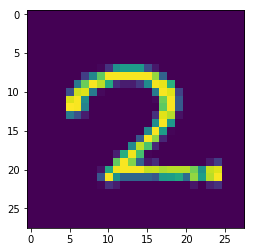

In [7]:
image = mnist_test[77][0]
plt.imshow(image)

## Anchor Explanations

In [8]:
explainer = anchor_image.AnchorImageMNIST([], 'yeet',
                               G=G, dataset = mnist_test)

In [9]:
%%time
segments, exp = explainer.explain_instance(image,predict_fn,verbose=True)

True pred 2
Taking coverage data...
0 19 0.19876695
1 2 0.19394398
2 334 0.19991058
3 7 0.19333465
4 5 0.19650932
5 4 0.17469674
6 7 0.19443882
7 39 0.19928616
8 237 0.19841471
9 340 0.19843191
10 3 0.19857404
11 55 0.19770023
12 65 0.19524856
13 57 0.19995986
14 61 0.1999799
15 18 0.19931754
16 14 0.19958854
17 58 0.1999709
18 11 0.19837211
19 123 0.19994757
20 6 0.19942434
21 8 0.1997429
22 5 0.1862656
23 3 0.19632499
24 35 0.1994637
25 13 0.19504437
26 15 0.19475253
27 8 0.19403665
28 19 0.19980147
29 49 0.1995556
30 19 0.19954677
31 20 0.19117932
32 5 0.18841144
33 325 0.1999535
34 3 0.17235835
35 38 0.19899194
36 10 0.18657131
37 148 0.19397366
38 101 0.1966828
39 4 0.19573747
40 216 0.19967797
41 3 0.18929775
42 145 0.19979024
43 29 0.1998603
44 80 0.19996408
45 63 0.19893672
46 10 0.19877873
47 24 0.1974194
48 82 0.19577816
49 22 0.19923036
50 3 0.19513474
51 31 0.19874749
52 33 0.19901133
53 230 0.19999807
54 4 0.19195704
55 21 0.1978432
56 4 0.1901799
57 39 0.19967727
58 4 0.1

63 445 0.19998902
0 107 0.19328606
1 257 0.19970003
2 338 0.19901028
3 69 0.19988698
4 809 0.19997439
5 224 0.19630887
6 1001 0.24900153
7 1001 0.23323192
8 77 0.19734074
9 205 0.19519672
10 1001 0.2249372
11 502 0.19936465
12 160 0.19444178
13 490 0.19968002
14 230 0.19562835
15 692 0.19876371
16 239 0.19405572
17 78 0.19978482
18 384 0.19706623
19 230 0.19941573
20 1001 1.2123152
21 636 0.19996321
22 161 0.19977272
23 99 0.1872104
24 298 0.19928277
25 1001 0.533921
26 1001 0.24907832
27 382 0.19972724
28 121 0.19835727
29 183 0.1995692
30 288 0.19719192
31 1001 0.24938442
32 93 0.19850163
33 498 0.199656
34 987 0.19952744
35 1001 0.32537493
Best: 5 (mean:0.6218905473, n: 201, lb:0.4367) Worst: 2 (mean:0.0000, n: 1, ub:1.0000) B = 0.56
0 14 0.19787289
1 11 0.15268862
2 1001 0.4269043
3 61 0.1999889
4 61 0.18745135
5 112 0.19726412
6 1001 0.39257693
7 68 0.19950664
8 36 0.19965076
9 100 0.19955651
10 1001 0.3684037
11 71 0.19940038
12 31 0.1896615
13 421 0.199986
14 1001 2.3840642
15 7

24 97 0.19983506
25 3 0.11859564
26 255 0.19989699
27 5 0.19830455
28 67 0.19942792
29 5 0.18099539
30 8 0.19994603
31 19 0.19879566
32 4 0.15437454
33 118 0.19998553
34 5 0.19741885
35 23 0.19778194
36 7 0.19000347
37 13 0.19465116
38 42 0.19974609
39 127 0.1983059
40 33 0.1986366
41 3 0.17763694
42 2 0.15678376
43 7 0.1664685
44 5 0.19604006
45 42 0.19945736
46 15 0.1947859
47 8 0.19438136
48 16 0.1992251
49 24 0.19939321
50 25 0.19959213
51 28 0.19686133
52 145 0.19909735
53 64 0.198924
54 38 0.19698054
55 84 0.19959998
56 58 0.19932793
57 6 0.19969012
58 17 0.1915028
59 11 0.1993265
60 3 0.1990809
61 66 0.19996701
62 14 0.19913168
63 19 0.1979821
0 6 0.16385016
1 75 0.19944538
2 108 0.19928053
3 11 0.19889703
4 1 0.18725008
5 10 0.19980355
6 7 0.19734302
7 4 0.19840302
8 134 0.19954798
9 8 0.19169578
10 3 0.19509752
11 2 0.14758283
12 39 0.19999675
13 16 0.1999896
14 2 0.19340928
15 53 0.1984335
16 16 0.19826578
17 77 0.19929613
18 2 0.14286941
19 2 0.16530304
20 132 0.19986863
21 

12 242 0.19936088
13 294 0.19672355
14 73 0.18968031
15 8 0.19598877
16 87 0.19051601
17 3 0.19761768
18 91 0.19952087
19 155 0.19946931
20 140 0.1997938
21 238 0.17821938
22 519 0.099324785
23 445 0.19767746
24 30 0.19471477
25 60 0.19514024
26 99 0.19939335
27 543 0.1974911
28 393 0.13879144
29 14 0.19149543
30 548 0.19556569
31 121 0.19997257
32 36 0.19985849
33 539 0.14170142
34 38 0.19971947
35 406 0.17727616
0 332 0.19927819
1 64 0.19189109
2 47 0.19891223
3 130 0.1885044
4 356 0.18423747
5 591 0.19989572
6 327 0.19351615
7 218 0.19965746
8 14 0.19039388
9 1000 0.19966494
10 74 0.19589204
11 54 0.19918877
12 326 0.19712134
13 189 0.19989517
14 31 0.1987703
15 81 0.1966575
16 135 0.1965462
17 89 0.19332296
18 314 0.19784868
19 63 0.19373699
20 22 0.19916178
21 111 0.19924235
22 57 0.19216047
23 505 0.19412819
24 324 0.199368
25 347 0.19464111
26 135 0.1976843
27 327 0.19953595
28 172 0.19825701
29 192 0.19698675
30 337 0.1979215
31 584 0.19247375
32 50 0.19194359
33 784 0.19857611

34 67 0.19997871
35 57 0.19450417
36 36 0.19928418
37 1001 0.28429198
38 119 0.19239861
39 47 0.1724365
40 125 0.19863302
41 131 0.19970262
42 266 0.19901045
43 35 0.1967906
44 201 0.1980008
45 1001 0.2829025
46 201 0.19964695
47 791 0.1994132
48 1001 0.28300357
49 323 0.14826596
50 141 0.19821836
51 1001 0.28852978
52 243 0.19105299
53 150 0.19974096
54 25 0.19847706
55 220 0.19230011
56 973 0.15871783
57 68 0.19560005
58 398 0.19931526
59 19 0.19827381
60 8 0.19769518
61 370 0.19934973
62 70 0.19901808
63 141 0.19846863
0 85 0.18807837
1 350 0.19719252
2 1001 0.27862152
3 455 0.15443628
4 42 0.18792829
5 54 0.19725488
6 321 0.19853193
7 19 0.19972543
8 76 0.19845927
9 837 0.19114977
10 199 0.19986711
11 13 0.19573943
12 78 0.1953308
13 781 0.19338451
14 29 0.19193569
15 209 0.19971807
16 379 0.19852518
17 242 0.1949623
18 101 0.19832075
19 13 0.19986346
20 299 0.18518427
21 341 0.1958658
22 556 0.18503973
23 90 0.19702539
24 15 0.1966782
25 564 0.18701191
26 229 0.19462122
27 74 0.18

In [11]:
exp

[(5, '', 0.6422628951747088, [], 0), (4, '', 0.9601990049751243, [], 0)]

In [12]:
exp_ = {}
exp_['feature']=[5,4]
_,mask = image_utils.create_mask(image,segments,exp_)

In [63]:
anchored = mask*((image-0.5)*2)
# final = (1-mask)* + target

Text(0.5,1,'Anchored Image')

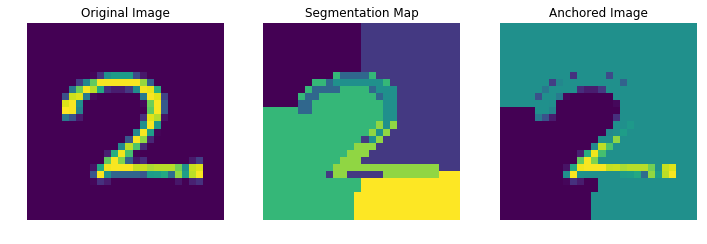

In [95]:
fig, ax = plt.subplots(1,3,figsize = (12,12))
[ax[i].set_axis_off() for i in range(3)]
ax[0].imshow((image-0.5)*2, vmin=-1,vmax=1)
ax[0].set_title('Original Image')
ax[1].imshow(segments)
ax[1].set_title('Segmentation Map')
ax[2].imshow(anchored,vmin=-1, vmax=1)
ax[2].set_title('Anchored Image')
# ax[1].imshow(final,vmin=-1, vmax=1)
# plt.axis('off');

## Examples of Generated G(z | A)

In [14]:
target = mask*((image-0.5)*2)

In [16]:
# batch_target = np.repeat(target[np.newaxis,:,:],10,axis=0)
raw_reconstruct,background = csgm.reconstruct(target, mask, np.sum(mask), G, 10)

0 198 0.19972296
1 98 0.19471903
2 32 0.19747639
3 292 0.19956186
4 150 0.1975922
5 510 0.19995458
6 202 0.1712218
7 286 0.19687408
8 262 0.19532378
9 230 0.1410787


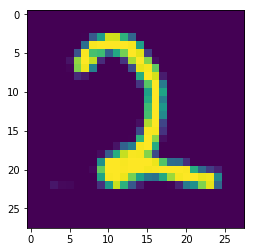

In [30]:
plt.imshow(raw_reconstruct[2])

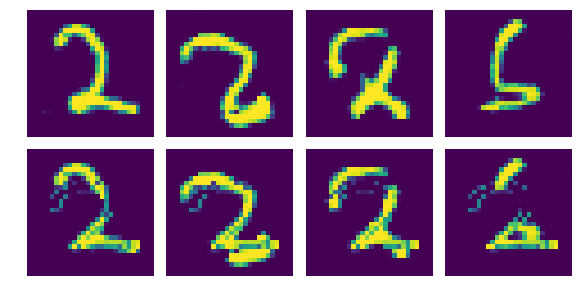

In [93]:
plt.figure(figsize=(10,10))
ax = [plt.subplot(4,4,i+1) for i in range(8)]
plt.subplots_adjust(wspace=0, hspace=0.1);
[ax[i].set_axis_off() for i in range(8)]
ax[0].imshow(raw_reconstruct[2])
ax[1].imshow(raw_reconstruct[4])
ax[2].imshow(raw_reconstruct[6])
ax[3].imshow(raw_reconstruct[7])
ax[4].imshow(background[2] + target)
ax[5].imshow(background[4] + target)
ax[6].imshow(background[6] + target)
ax[7].imshow(background[7] + target)